In [13]:
!pip install sqlalchemy==1.3.9
!pip install ibm_db_sa

In [14]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [15]:
#connection with DB2
%sql ibm_db_sa://<credentials over here>/bludb?security=SSL

In [16]:
import pandas as pd
df=pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.head()

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [18]:
#export csv to database
%sql --persist df

 * ibm_db_sa://mlc11986:***@fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/bludb


'Persisted df'

In [23]:
#sql query
%sql select MAX(percent_households_below_poverty) as maximum from df 

 * ibm_db_sa://mlc11986:***@fbd88901-ebdb-4a4f-a32e-9822b9fb237b.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32731/bludb
Done.


maximum
56.5


In [24]:
#visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

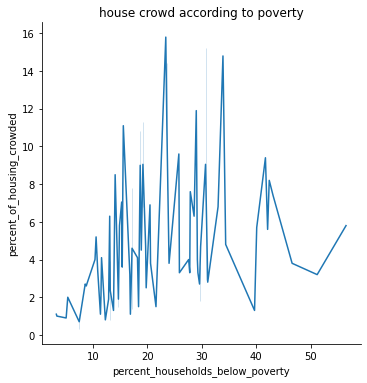

In [38]:
plot=sns.relplot(x="percent_households_below_poverty",y="percent_of_housing_crowded",kind="line",data=df)
plt.title('house crowd according to poverty')
plt.show()

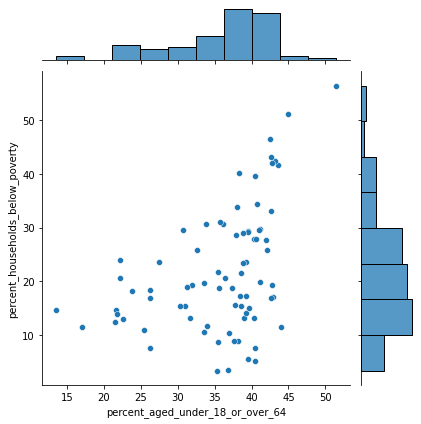

In [40]:
sns.jointplot(x="percent_aged_under_18_or_over_64",y="percent_households_below_poverty",data=df)
plt.show()

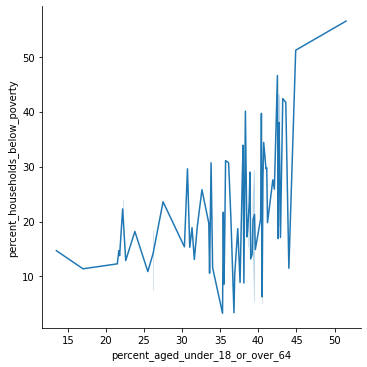

In [47]:
sns.relplot(x="percent_aged_under_18_or_over_64",y="percent_households_below_poverty",kind="line",data=df)
plt.show()